<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity   

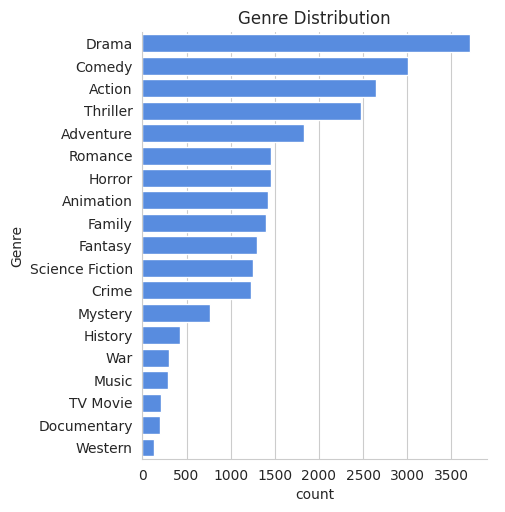

Vote_Average
average        6613
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64


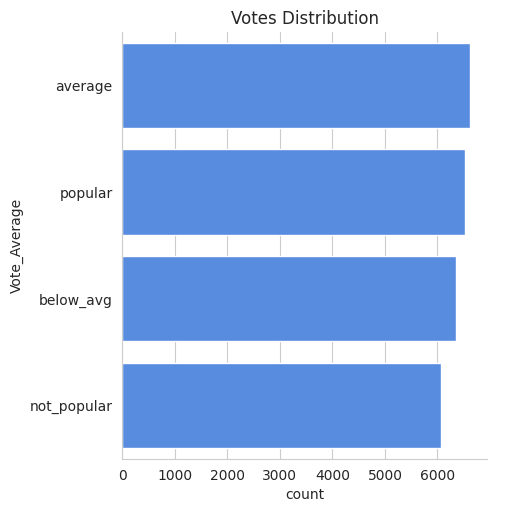

Most Popular Movie:
    Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
Least Popular Movie:
        Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average      

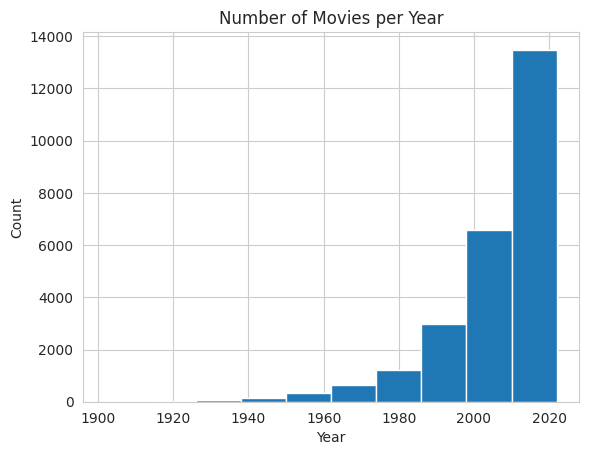

In [4]:
# 📌 Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 Load Dataset
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

# 🔍 Basic Info
df.info()
df.describe()

# 🧼 Clean Data: Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year

# 🧹 Drop unused columns
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True)

# 🔠 Categorize Vote_Average into 4 labels
def categorize_column(df, col, labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_column(df, 'Vote_Average', labels)

# ❌ Drop any rows with NaNs (if any after binning)
df.dropna(inplace=True)

# 🎭 Split Genres into individual rows
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

# 🧾 Convert Genre to category dtype
df['Genre'] = df['Genre'].astype('category')

# ✅ Cleaned Data Summary
print(df.info())
print(df.nunique())

# 🎨 Data Visualization
sns.set_style('whitegrid')

# Q1: Most frequent genre
print(df['Genre'].value_counts())
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287f5')
plt.title('Genre Distribution')
plt.show()

# Q2: Genres with highest votes (based on categorized Vote_Average)
print(df['Vote_Average'].value_counts())
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title('Votes Distribution')
plt.show()

# Q3: Movie with highest popularity
print("Most Popular Movie:\n", df[df['Popularity'] == df['Popularity'].max()])

# Q4: Movie with lowest popularity
print("Least Popular Movie:\n", df[df['Popularity'] == df['Popularity'].min()])

# Q5: Year with the most movies
df['Release_Date'].hist()
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
